# urlib

In [13]:
from urllib.request import urlopen, Request
import urllib

url = "http://ghmkt.kr/" #요청을 하고자 하는 웹 사이트입니다.

req = Request(url)  #요청 객체를 만드는 부분입니다.
page = urlopen(req) #만들어진 요청 객체를 이용하여 요청하는 부분입니다.

print(page)
print(page.code)
print(page.headers)
print(page.url)
print(page.info().get_content_charset())
#print(page.read())   #urllib은 read()함수를 이용하여 HTML을 바이너리 형태로 가져옵니다.

200
Date: Fri, 28 Sep 2018 07:01:37 GMT
Server: Apache/2.4.7 (Ubuntu)
X-Powered-By: PHP/5.5.9-1ubuntu4.26
Set-Cookie: ci_kisession=a%3A5%3A%7Bs%3A10%3A%22session_id%22%3Bs%3A32%3A%2250d32bf562105c0f822d09b2df4fca2c%22%3Bs%3A10%3A%22ip_address%22%3Bs%3A13%3A%22130.211.1.146%22%3Bs%3A10%3A%22user_agent%22%3Bs%3A17%3A%22Python-urllib%2F3.6%22%3Bs%3A13%3A%22last_activity%22%3Bi%3A1538118097%3Bs%3A9%3A%22user_data%22%3Bs%3A0%3A%22%22%3B%7D0b1a888cbd8d367649edb17235130769; path=/; domain=.ghmkt.kr
P3P: CP="NOI CURa ADMa DEVa TAIa OUR DELa BUS IND PHY ONL UNI COM NAV INT DEM PRE"
Cache-Control: max-age=0, no-cache, pre-check=0, post-check=0
Pragma: no-cache
Set-Cookie: ci_kisession=a%3A4%3A%7Bs%3A10%3A%22session_id%22%3Bs%3A32%3A%2250d32bf562105c0f822d09b2df4fca2c%22%3Bs%3A10%3A%22ip_address%22%3Bs%3A13%3A%22130.211.1.146%22%3Bs%3A10%3A%22user_agent%22%3Bs%3A17%3A%22Python-urllib%2F3.6%22%3Bs%3A13%3A%22last_activity%22%3Bi%3A1538118097%3B%7D59cc818894c3a5c6a11f57914729e391; path=/; domain=.gh

# BeautifulSoup

In [2]:
from bs4 import BeautifulSoup as bs

html = """<html> <head> </head> <body> <p>test</p> </body></html>"""

soup = bs(html, 'lxml')
print(soup)
print(type(soup))
print()
print(soup.prettify())

<html> <head> </head> <body> <p>test</p> </body></html>
<class 'bs4.BeautifulSoup'>

<html>
 <head>
 </head>
 <body>
  <p>
   test
  </p>
 </body>
</html>


In [3]:
from bs4 import BeautifulSoup

html = """<html> <head> </head> <body> <p>test</p> </body></html>"""

soup = BeautifulSoup(html, 'lxml') #bs라는 이름으로 불러왔으니 보통 bs(html, 'lxml')로 쓴다.
print(soup.prettify())

<html>
 <head>
 </head>
 <body>
  <p>
   test
  </p>
 </body>
</html>


In [4]:
from bs4 import BeautifulSoup as bs

html = """<html> <head><title class = 'GH' id = "이재경"> Crawling </title> </head> <body> <p>Growth</p> 
<p>Hackers</p> <p>GH</p></body></html>"""

soup = BeautifulSoup(html, 'lxml')
tag_p = soup.p

print(tag_p)
print(tag_p.text)
print(tag_p.string)
print(tag_p.name)

tag_title= soup.title

print();print(tag_title.attrs)
print(tag_title['class'])
print(tag_title['id'])

print(); print(tag_title.get('class1'))
print(tag_title.get('class1','없음'))


<p>Growth</p>
Growth
Growth
p

{'class': ['GH'], 'id': '이재경'}
['GH']
이재경

None
없음


In [5]:
from bs4 import BeautifulSoup as bs

html = """<html> <head><title > Crawling </title> </head> <body>
<p><span>Growth</span><span>Hackers</span><span>GH</span></p></body></html>"""

soup = BeautifulSoup(html, 'lxml')
tag_p_child = soup.p.children

print('p 자식 태그')
for child in tag_p_child:
    print(child)
    
tag_span = soup.span
span_parents = tag_span.parents

print('span 부모 태그')
for parent in span_parents:
    print(parent)

next_sibling = tag_span.next_sibling
prev_sibling = next_sibling.previous_sibling

print(next_sibling)
print(prev_sibling)


p 자식 태그
<span>Growth</span>
<span>Hackers</span>
<span>GH</span>
span 부모 태그
<p><span>Growth</span><span>Hackers</span><span>GH</span></p>
<body>
<p><span>Growth</span><span>Hackers</span><span>GH</span></p></body>
<html> <head><title> Crawling </title> </head> <body>
<p><span>Growth</span><span>Hackers</span><span>GH</span></p></body></html>
<html> <head><title> Crawling </title> </head> <body>
<p><span>Growth</span><span>Hackers</span><span>GH</span></p></body></html>
<span>Hackers</span>
<span>Growth</span>


In [6]:
##find_all( ) 함수를 사용하면 원하는 태그들을 리스트의 형태로 얻어올 수 있다.

html = """<html> <head><title class = 'GH' id = "이재경"> Crawling </title> </head> <body> <p>Growth</p> 
<p>Hackers</p> <p id= "GH">GH</p></body></html>"""

soup = BeautifulSoup(html, 'lxml')

print(soup.find_all('p'))
print(soup.find('p'))
print(soup.find_all(id='이재경'))
print(soup.body.find_all(id=False))
print(soup.find_all('p',id='GH'))
print(soup.find_all('title',class_='GH')) #class_는 기존의 클래스를 만들 때 사용하는 키워드인 class와 중복을 피해주기 위해서 사용
print(soup.find_all('title','GH'))

for name in soup.find_all('title','GH'):
    print(name.get_text())

[<p>Growth</p>, <p>Hackers</p>, <p id="GH">GH</p>]
<p>Growth</p>
[<title class="GH" id="이재경"> Crawling </title>]
[<p>Growth</p>, <p>Hackers</p>]
[<p id="GH">GH</p>]
[<title class="GH" id="이재경"> Crawling </title>]
[<title class="GH" id="이재경"> Crawling </title>]
 Crawling 


In [7]:
##select() 함수를 이용하면 find_all() 처럼 리스트로 반환하지만 CSS 셀렉터를 활용하여 원하는 요소에 접근합니다.

html = """<html> <head><title class = 'GH' id = "이재경"> Crawling </title> </head> 
<body> <p id = "i" class = "a">Growth</p> <p class= "d">Hackers</p> <p class= "d">GH</p></body></html>"""

soup = BeautifulSoup(html, 'lxml')

print(soup.select('p')) #클래스는 마침표(.), 아이디는 샵(#)으로 접근
print(soup.select('.d'))
print(soup.select('p.d'))
print(soup.select('#i'))
print(soup.select('p#i'))
print(soup.select('body > p#i'))  #띄어쓰기를 이용하거나(body p#i) '>'를 이용하여 자식 태그 표현


[<p class="a" id="i">Growth</p>, <p class="d">Hackers</p>, <p class="d">GH</p>]
[<p class="d">Hackers</p>, <p class="d">GH</p>]
[<p class="d">Hackers</p>, <p class="d">GH</p>]
[<p class="a" id="i">Growth</p>]
[<p class="a" id="i">Growth</p>]
[<p class="a" id="i">Growth</p>]


# 정규식

In [10]:
#find_all( )과 find( )를 사용할 때 정규식을 사용하면 좀 더 활용도가 높아집니다

from bs4 import BeautifulSoup as bs
import re

test_str = "test tlsd j test1"

pattern = re.compile('test')

a = pattern.match(test_str)
b = pattern.search(test_str)
c = pattern.findall(test_str)
d = pattern.finditer(test_str)

print('--match result--') #처음 시작부터 정규식과 일치해야 match가 이루어지며 정규식과 다르면 에러가 난다 
print(a)
print(a.group(),a.start, a.end(),a.span())
print()

print('--search result--') # 문자열에서 일치하는 정규식을 하나 찾아준다
print(b)
print(b.group(),b.start, b.end(),b.span())
print()

print('--findall result--') #정규식과 매치되는 모든 문자열을 리스트로 반환한다
print(c)
print()

print('--finditer result--') #정규식과 매치되는 모든 문자열을 iterable 객체로 반환하기에 반복문을 이용해야 한다
print(d)
for i in d:
    print(i.group(),i.start, i.end(),i.span())

--match result--
<_sre.SRE_Match object; span=(0, 4), match='test'>
test <built-in method start of _sre.SRE_Match object at 0x000002326AC7DF38> 4 (0, 4)

--search result--
<_sre.SRE_Match object; span=(0, 4), match='test'>
test <built-in method start of _sre.SRE_Match object at 0x000002326B010A58> 4 (0, 4)

--findall result--
['test', 'test']

--finditer result--
test <built-in method start of _sre.SRE_Match object at 0x000002326B059718> 4 (0, 4)
test <built-in method start of _sre.SRE_Match object at 0x000002326B059D98> 16 (12, 16)


In [11]:
p = re.compile("Grow[a-zA-Z]*[0-9]+")

print(p.match("GrowthHackers3"))
print(p.search("GrowthHackers3"))
print(p.match("GrowthHackers"))

p.findall("GrowthHackers GrowthHackers3 GrowthHacker4")


<_sre.SRE_Match object; span=(0, 14), match='GrowthHackers3'>
<_sre.SRE_Match object; span=(0, 14), match='GrowthHackers3'>
None


['GrowthHackers3', 'GrowthHacker4']

In [12]:
import re

test_str= """Good afternoon 222"""

pattern = re.compile('[a-z]')
pattern1 = re.compile('[a-z]+')
pattern2 = re.compile('[a-zA-Z]*')
pattern3 = re.compile('[a-zA-Z0-9]')
pattern4 = re.compile('\w+')
pattern5 = re.compile('[^a-z]+')

a = pattern.findall(test_str)
b = pattern1.findall(test_str)
c = pattern2.findall(test_str)
d = pattern3.findall(test_str)
e = pattern4.findall(test_str)
f = pattern5.findall(test_str)

print(a)
print(b)
print(c)
print(d)
print(e)
print(f)

['o', 'o', 'd', 'a', 'f', 't', 'e', 'r', 'n', 'o', 'o', 'n']
['ood', 'afternoon']
['Good', '', 'afternoon', '', '', '', '', '']
['G', 'o', 'o', 'd', 'a', 'f', 't', 'e', 'r', 'n', 'o', 'o', 'n', '2', '2', '2']
['Good', 'afternoon', '222']
['G', ' ', ' 222']


In [13]:
import re

test_num = "저의 전화번호는 010-6354-0802 입니다"

pattern = re.compile('[0-9][0-9][0-9]-[0-9][0-9][0-9][0-9]-[0-9][0-9][0-9][0-9]')
pattern1 = re.compile('\d\d\d-\d\d\d\d-\d\d\d\d')
pattern2 = re.compile('\d{3}-\d{4}-\d{4}')

a = pattern.findall(test_num)
b = pattern1.findall(test_num)
c = pattern2.findall(test_num)

print(a)
print(b)
print(c)

['010-6354-0802']
['010-6354-0802']
['010-6354-0802']


In [14]:
import re

test_str = """test tests toast toasts"""

pattern = re.compile('t..t')
pattern1 = re.compile('t...t')
pattern2 = re.compile('t?est\w+')
pattern3 = re.compile('t?est\w*')

a = pattern.findall(test_str)
b = pattern1.findall(test_str)
c = pattern2.findall(test_str)
d = pattern3.findall(test_str)

print(a)
print(b)
print(c)
print(d)

['test', 'test']
['toast', 'toast']
['tests']
['test', 'tests']


# Selenium

In [15]:
# import selenium
from selenium import webdriver
import time
import requests
from selenium.webdriver.common.keys import Keys

In [16]:
path = 'C:/Users/dlwor/chromedriver.exe' # 크롬드라이브 경로 지정  ## 맥과 리눅스는 exe.를 붙이지 않습니다. 

driver = webdriver.Chrome(path)

In [17]:
driver.get("https://amazon.com")

In [18]:
#3초간 쉬는 명령어
time.sleep(3) # = driver.implicitly_wait(3)
# naver에 접속한다
driver.get("https://naver.com")
# 현재 페이지 확인
print(driver.current_url)
# 크롬에서 주소창위에 나오는 이름
print(driver.title)

https://www.naver.com/
NAVER


In [21]:
search = driver.find_element_by_id('query')

In [22]:
from selenium.webdriver.common.keys import Keys

In [23]:
search.send_keys("Growth hacking")

In [24]:
search.submit()

In [27]:
#해당 사이트 제목이 NAVER인지 확인
assert 'NAVER' in driver.title

In [26]:
#사이트의 title이 다르면 Error 메시지가 뜬다.
assert 'Google' in driver.title 

AssertionError: 

In [28]:
#스크린샷 기능
driver.save_screenshot('chrome.png')

True

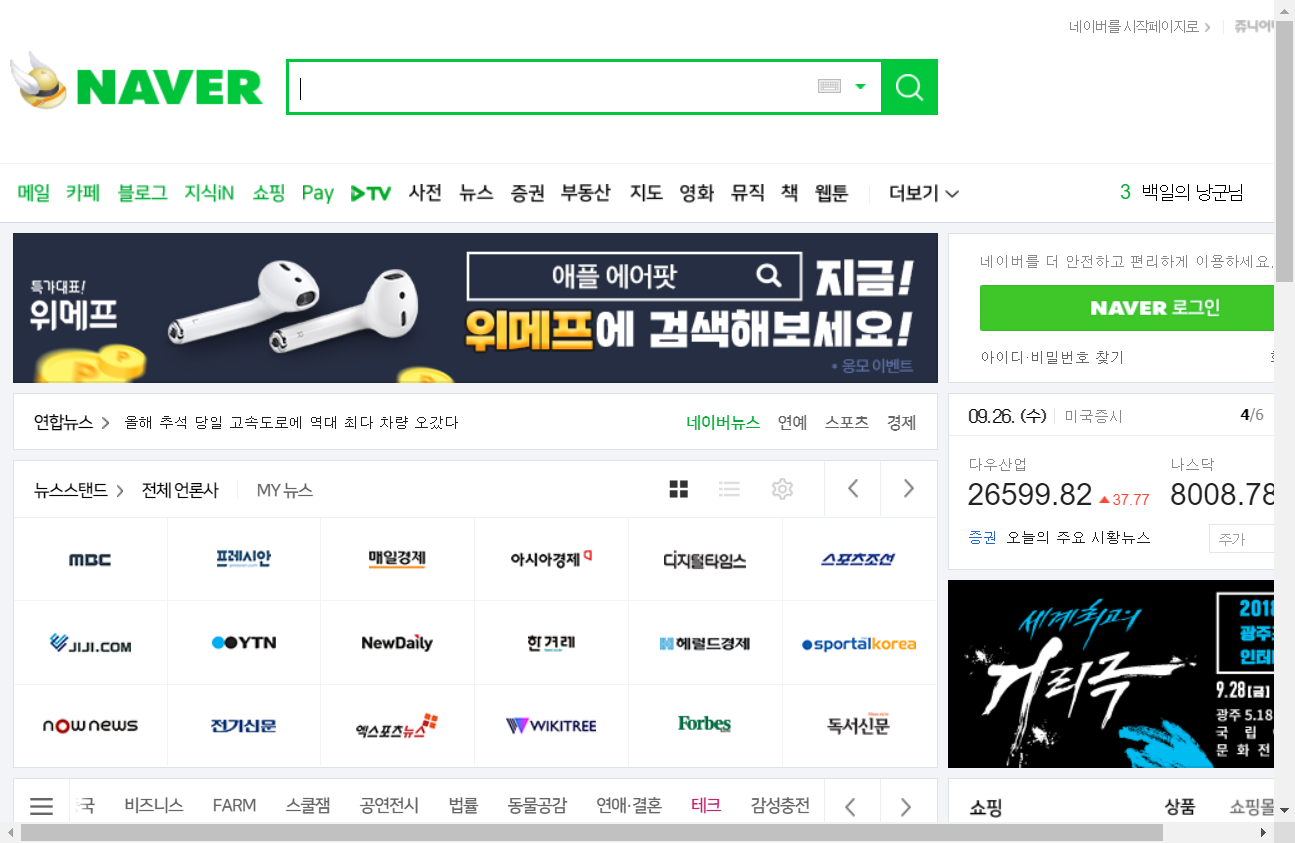

In [29]:
from PIL import Image
im = Image.open('chrome.png')
im

# 멜론에서 TOP 100 차트 가져오기

In [30]:
from bs4 import BeautifulSoup as bs              # 데이터파싱 라이브러리
import urllib.request as req                     # 데이터수신 라이브러리
import pandas as pd                              # 데이터정리 라이브러리 
import datetime                                  # 날짜데이터 라이브러리
import re                                        # 정규표현식 라이브러리

In [31]:
melon_list = pd.DataFrame(columns = ['artist',
                                     'artist_code',
                                     'title',
                                     'title_code',
                                     'rank',
                                     'date',
                                     'hour',
                                     'site'])

In [32]:
melon_list.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
artist         0 non-null object
artist_code    0 non-null object
title          0 non-null object
title_code     0 non-null object
rank           0 non-null object
date           0 non-null object
hour           0 non-null object
site           0 non-null object
dtypes: object(8)
memory usage: 0.0+ bytes


In [33]:
dt_now = datetime.datetime.now() 
print(dt_now)

2018-09-26 01:47:07.542316


아래와 같이 헤더를 만들어 보내면 서버는 요청된 것을 윈도우- 크롬에서 요청한 것으로 인지한다.

In [34]:
url = "http://www.melon.com/chart/index.htm"
header_ = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36"

In [35]:
request = req.Request(url, headers = {'User-Agent':header_})
html = req.urlopen(request)
page = bs(html.read(), 'lxml')

In [38]:
print(html.getcode()) # 200이 뜨면 잘 불러온 것!

200


In [39]:
page.find("div", {'class':'ellipsis rank01'})

<div class="ellipsis rank01"><span>
<a href="javascript:melon.play.playSong('19030101',31316695);" title="하루도 그대를 사랑하지 않은 적이 없었다 재생">하루도 그대를 사랑하지 않은 적이 없었다</a>
</span></div>

In [40]:
song_title = page.find("div", {'class':'ellipsis rank01'}).get_text().strip()
song_artist = page.find("span", {'class':'checkEllipsis'}).get_text().strip()

print(song_title)
print(song_artist)

하루도 그대를 사랑하지 않은 적이 없었다
임창정


In [41]:
page.find("div", {'class':'ellipsis rank01'})

<div class="ellipsis rank01"><span>
<a href="javascript:melon.play.playSong('19030101',31316695);" title="하루도 그대를 사랑하지 않은 적이 없었다 재생">하루도 그대를 사랑하지 않은 적이 없었다</a>
</span></div>

In [42]:
songlists50 = page.find_all('tr', {'class':'lst50'})
songlists100 = page.find_all('tr', {'class':'lst100'})

In [43]:
for half in [songlists50, songlists100]:
    for songs in half:
        song_artist = songs.find("span", {'class':'checkEllipsis'}).get_text().strip()

        ac = songs.find('span', {'class':'checkEllipsis'})
        p = re.compile('[0-9]+')
        song_artist_code = int(p.findall(str(ac))[0])

        song_title = songs.find("div", {'class':'ellipsis rank01'}).get_text().strip()
        song_title_code = int(songs['data-song-no'])
        song_rank = int(songs.find("span", {'class' : "rank "}).get_text())
        song_date = dt_now.strftime('%Y-%m-%d')
        song_hour = dt_now.strftime('%H')
        song_site = "melon"

    
        melon_list = melon_list.append(
            {'artist':song_artist,
             'artist_code':song_artist_code,
             'title' : song_title,
             'title_code' : song_title_code,
             'rank' : song_rank,
             'date' : song_date,
             'hour' : song_hour,
             'site' : song_site}, ignore_index = True)  

In [45]:
melon_list.to_csv(dt_now.strftime("%Y_%m_%d_%H")+".csv", index=False, encoding = 'euc-kr')

In [46]:
####### 엘범사진 src 가져오기

a= []
for name in page.find("a", {'class':'image_typeAll'}).children:
    a.append(name)
a[1]['src']

'https://cdnimg.melon.co.kr/cm/album/images/102/05/805/10205805_500.jpg/melon/resize/120/quality/80/optimize'

In [47]:
urllib.request.urlretrieve(a[1]['src'], "C:/Users/dlwor/Desktop/jupyter_notebook/image/{0}.jpg".format(song_title))

('C:/Users/dlwor/Desktop/jupyter_notebook/image/하루도 그대를 사랑하지 않은 적이 없었다.jpg',
 <http.client.HTTPMessage at 0x2326cd42908>)

# Amazon Today's Deals

In [48]:
url = "https://www.amazon.com"
header_ = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36"

request = req.Request(url, headers = {'User-Agent':header_})
html = req.urlopen(request)
page = bs(html.read(), 'lxml')

In [49]:
print(html.getcode())

200


In [50]:
left_time = page.find("span", {'id':'100_dealView_1_dealClock'})
print(left_time)

None


기존의 방식으로 남은 시간을 긁어오려하면 나타나지가 않는다. 이는 이 시간이 JavaScript로 되어있기 때문이다. 따라서 이와 같은 정보를 읽어 오는데 selenium이 큰 도움이 될 수 있다. 

In [51]:
# import selenium
from selenium import webdriver
import time
import requests
from selenium.webdriver.common.keys import Keys

In [52]:
path = 'C:/Users/dlwor/chromedriver.exe' 
driver = webdriver.Chrome(path)

In [53]:
driver.get("https://www.amazon.com/gp/goldbox/")

In [54]:
html = driver.page_source
soup = BeautifulSoup(html,'lxml')
left_time_sel = soup.find("span", {'id':'100_dealView_1_dealClock'})
print(left_time_sel.text)

14:11:53


In [55]:
driver.execute_script('alert("수고하셨어요!!")')

# Quest 네이버 정치 기사 긁어 오기

In [14]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

url = "https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid2=269" #네이버 정치 기사 페이지

html = urlopen(url)
soup = BeautifulSoup(html,"lxml",from_encoding='utf-8')

articles = soup.findAll("dt")

ex_dl = articles[1].find("a")["href"] ## 정치 기사 메인 페이지에서 기사들로 가는 url 
print(ex_dl)


https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=003&aid=0008828879


In [8]:
url_list = []

for link in articles:
    url_list.append(link.find("a")["href"])
    
#url_list


url_list2 = list(set(url_list)) ##중복 제거
url_list2

['https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=003&aid=0008828802',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=003&aid=0008828801',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=001&aid=0010368324',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=422&aid=0000340230',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=056&aid=0010624207',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=003&aid=0008828810',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=003&aid=0008828811',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=001&aid=0010368319',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=001&aid=0010368323',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=022&aid=0003306747',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=081&aid=0002945550',

In [9]:
html = urlopen(url_list[0])
soup = BeautifulSoup(html,"html.parser",from_encoding='utf-8')

content = soup.find("div",{"id":"articleBodyContents"})
title = soup.find("h3",{"id":"articleTitle"}).find(text=True)

In [12]:
# -*- coding: utf-8 -*-
import re
hangul = re.compile('[^ ㄱ-ㅣ가-힣.'']+') # # 한글과 띄어쓰기 . ''""를 제외한 모든 글자


test = str(content.find)

result = hangul.sub('',test) # 한글과 띄어쓰기를 제외한 모든 글자 제외
result = re.sub('본문 내용  플레이어   플레이어    오류를 우회하기 위한 함수 추가','',result)
result = re.sub('본문 내용  플레이어   동영상 뉴스       영상 플레이어   플레이어    오류를 우회하기 위한 함수 추가','',result)

print(title)
print(result)

바른미래도 남북국회회담 참여키로…한국당 ‘불참’ 고수
  .      서울신문  ... 문희상 국회의장과 각 당 대표들이 일 국회 사랑재에서 열린 국회의장 주최 정당 대표 초청 오찬 간담회에서 손을 맞잡고 있다. 왼쪽부터 정의당 이정미 대표 바른미래당 손학규 대표 더불어민주당 이해찬 대표 문 의장 자유한국당 김병준 비대위원장 민주평화당 정동영 대표. 김명국 선임기자 ..바른미래당이 국회 차원에서 추진 중인 남북국회회담에 참여하기로 했다.김삼화 수석대변인은 일 국회에서 열린 최고위원회의 직후 기자들과 만나 북한 최고인민회의와의 남북국회회담에 우리 당도 함께하는 것으로 결정했다며 국회와 함께한다는 원칙이라고 밝혔다.   김 수석대변인은 몇 명이 갈지는 국회에서 논의할 것이라며 각 당의 참여 규모 등에 대해서는 국회의장과 여야 원내대표들이 논의할 것이라고 설명했다.앞서 문희상 국회의장은 북한 최고인민회의에 연내 남북국회회담 제안이 담긴 친서를 전달했다. 이에 최태복 북한 최고인민회의 의장은 일 개최 제의에 원칙적으로 동의한다는 답신을 보내왔다.더불어민주당 민주평화당 정의당에 이어 바른미래당까지 남북국회회담 개최에 찬성하는 가운데 자유한국당은 불참 입장을 고수하고 있다.이양수 한국당 원내대변인은 일 논평을 통해 북한의 비핵화에 대한 실질적인 진척이 전혀 없는데 북한의 말의 성찬에 국회까지 나서 성급한 남북관계 개선에 발 벗고 나서고 있어 심히 우려된다며 남북국회회담은 한반도를 둘러싼 국제여건에 따라 여야간 충분한 협의 하에 추진 돼야 할 것이라고 말했다.   이근홍 기자 ..   ....서울신문 채널 구독하고 행복한 선물 받으세요   ...인기 무료만화  ..페이스북 서울신문... 무단전재 및 재배포금지  본문 내용 
